# BIKE SHARING CASE STUDY

## <font color="blue">Introduction
>Bike sharing system is a shared transport service, in which bikes are made available for shared use to a individuals on a short term basis for a price or fee. Many bike sharing systems allows customers to borrow a bike from one dock and return it at another dock of a same system. There are many bike sharing companies like BLOOM, OFO, Mobike, BoomBikes, Bounce, joyride, evemo, etc. in the world offering services in major metro cities.

## <font color="blue">Problem Statement
> A US bike sharing provider BoomBikes recently sufferered from revenue dips due to the ongoing corona pandemic.Because of the unexpected loss, the company is finding it difficult to sustain in the current market scenario. so it has decided to come up with the mindful business plan so that they can able to accelerate their revenue once the pandemic comes to an end and also boost the economy.
>    
> The company BoomBikes wanted to improve their business, they actually wanted to understand the demand of the shared bikes among the people once the pandemic comes to an end. They have planned this to prepare themselves to cater to the people's need and need to stand out among the competetors and to make huge profits.
>

## <font color="blue">Business Objectives

>The company specifically need to understand the factors affecting the demand of these shared bikes. They wants to find:
> - Which variables are significant in predicting the demand of the shared bikes
> - How well the variables describe the demand of the shared bikes
>    
>We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demand varies with different features

## <font color="blue">Data Understanding
    
>### 'day.csv'
> It contains the meterological informations, timing details and people's styles.
>    
> - instant: record index
> - dteday : date
> - season : season (1:spring, 2:summer, 3:fall, 4:winter)
> - yr : year (0: 2018, 1:2019)
> - mnth : month ( 1 to 12)
> - holiday : weather day is a holiday or not
> - weekday : day of the week
> - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
> + weathersit : 
	1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
> - temp : temperature in Celsius
> - atemp: feeling temperature in Celsius
> - hum: humidity
> - windspeed: wind speed
> - casual: count of casual users
> - registered: count of registered users
> - cnt: count of total rental bikes including both casual and registered

## <font color="blue">Data Preparation

### Importing libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels
import statsmodels.api as sm
import sklearn
import warnings
warnings.filterwarnings("ignore")

### Customizing Settings

In [2]:
# Customizing the settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Importing Data

In [3]:
# Importing the data
bike = pd.read_csv("day.csv", index_col=0)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Cleaning

In [4]:
# Analyzing the shape of the data
print("The shape of the bike sharing data is",bike.shape)

The shape of the bike sharing data is (730, 15)


In [5]:
# Checking the informations
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [6]:
# Checking for null values in all the columns
round((bike.isnull().sum()/len(bike))*100,2).sort_values(ascending=False)

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

There are no missing values in any of the rows or columns of the dataset

In [7]:
# Checking the unique values in the columns of the dataset
bike.apply(lambda x:len(x.unique()))

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
# Checking for duplicates
bike[bike.duplicated()]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,


No duplicate records are there in the dataset

In [9]:
# Changing the dteday column into datetime category to extract the day
bike["dteday"] = pd.to_datetime(bike["dteday"],format = "%d-%m-%Y")

# Extracting the weekday and day from dteday column
bike["Day_of_month"] = pd.DatetimeIndex(bike["dteday"]).day
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day_of_month
instant,,,,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


### Removing Redundant columns

#### 1. dteday column:
> - Already all the required informations are extracted from this column and new columns are created like year, month, day and the details of the day. Thus we can drop this column too.
#### 2. atemp column:
> - The atemp column(feel like temperature) is depend on the air temperature. thus it will be highly correlated. Thus we can drop this column.
#### 3. casual and registered columns:
> - Using this features for the model will results in data leakage.
> - Both these columns contains count of bike booked by the customers who casually using without registering and those who have registered already. However we have an another column which have total counts of both which we will be using as dependent variable. so thus we can drop these two columns.

In [10]:
# Dropping dteday, atemp, causal, and registered column
bike.drop(["dteday","atemp","casual","registered"], axis=1,inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-null    int64  
 1   yr            730 non-null    int64  
 2   mnth          730 non-null    int64  
 3   holiday       730 non-null    int64  
 4   weekday       730 non-null    int64  
 5   workingday    730 non-null    int64  
 6   weathersit    730 non-null    int64  
 7   temp          730 non-null    float64
 8   hum           730 non-null    float64
 9   windspeed     730 non-null    float64
 10  cnt           730 non-null    int64  
 11  Day_of_month  730 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 74.1 KB


In [11]:
# Lets rename the column name for our convenience
bike.rename(columns={"yr":"Year","mnth":"Month","weathersit":"Weather","temp":"Temperature","hum":"Humidity","cnt":"Count"},
           inplace=True)
bike.columns = bike.columns.str.strip().str.capitalize()
bike.index.name = "Index"
bike.columns.name = "Features"

In [12]:
bike.head()

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month
Index,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1
2,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,2
3,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,3
4,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,4
5,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,5


### Handling Data Types

In [13]:
# Checking the data types of the dataset
bike.dtypes

Features
Season            int64
Year              int64
Month             int64
Holiday           int64
Weekday           int64
Workingday        int64
Weather           int64
Temperature     float64
Humidity        float64
Windspeed       float64
Count             int64
Day_of_month      int64
dtype: object

In [14]:
# Creating a new variable Quartely before converting the month into categorical variable
bike["Quarterly"] = pd.cut(bike["Month"], bins=[0,3,6,9,12], labels=["first","second","third","fourth"])

# Giving exact names for some categorical column instead of number for easy interpretation
bike["Season"] = bike["Season"].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike["Year"] = bike["Year"].replace({0: "2018", 1:"2019"})
bike["Weekday"] = bike["Weekday"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",
                                           6:"Sat"})
bike["Month"] = bike["Month"].replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
                                      7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
bike.head(3)

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month,Quarterly
Index,,,,,,,,,,,,,
1,spring,2018,Jan,0,Sat,0,2,14.110847,80.5833,10.749882,985,1,first
2,spring,2018,Jan,0,Sun,0,2,14.902598,69.6087,16.652113,801,2,first
3,spring,2018,Jan,0,Mon,1,1,8.050924,43.7273,16.636703,1349,3,first


We know that the columns Season, Year, Month, Holiday, Weekday, Workingday, Weather, Day of month are categorical variables but expressed as integer. thus we need to change it into categorical types. So that we can create dummy variables.

In [15]:
# Converting the columns into categorical types
bike_cat = ["Season","Year","Month","Holiday","Weekday","Workingday","Weather","Day_of_month"]

for cols in bike_cat:
    bike[cols] = bike[cols].astype("category")
    
print(bike.dtypes)

Features
Season          category
Year            category
Month           category
Holiday         category
Weekday         category
Workingday      category
Weather         category
Temperature      float64
Humidity         float64
Windspeed        float64
Count              int64
Day_of_month    category
Quarterly       category
dtype: object


### Sanity Checks

In [16]:
# Neither weekends nor holidays are working days
bike[((bike["Holiday"]==1) | (bike["Weekday"].isin(["Sat","Sun"]))) & (bike["Workingday"] == 1) ]


Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month,Quarterly
Index,,,,,,,,,,,,,


No holidays or weekends are represented as working day.

### Data Visualization

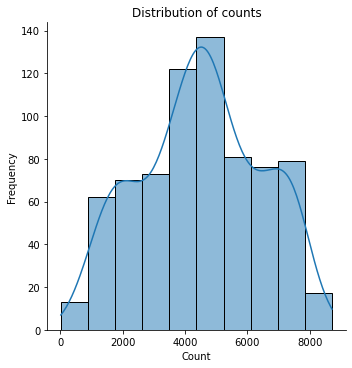

In [17]:
# Checking the distribution of counts
sns.displot(bike["Count"], bins=10, kde=True)
plt.title("Distribution of counts")
plt.ylabel("Frequency")
plt.show()

#### <font color="blue">Inference from the plot
> - The distribution of the counts is almost normally distributed.
> - On average around 4500 customers utilizing the bike service per day.

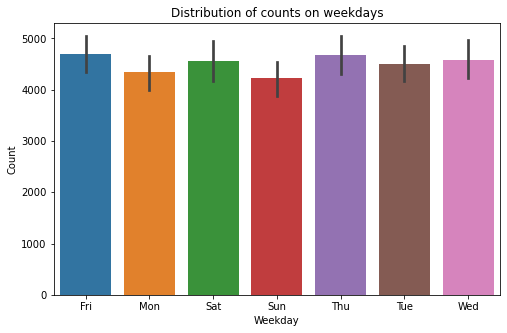

In [18]:
# Checking the counts on weekdays 
plt.figure(figsize=[8,5])
sns.barplot(data=bike, x="Weekday", y=bike["Count"])
plt.title("Distribution of counts on weekdays")
plt.show()

#### <font color="blue">Inference from the plot
> - The usage of bike is less on sundays.

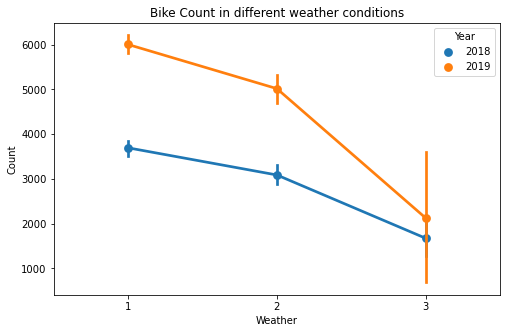

In [19]:
# Checking the counts with respect to weather
fig, ax = plt.subplots(figsize=[8,5])
sns.pointplot(data=bike, x="Weather", y="Count", hue="Year")
ax.set(title="Bike Count in different weather conditions")
plt.show()

#### <font color="blue">Inference from the plot
> - when there is light snow, light rain, thunderstorm the number of bike users decreases.
> - From the data it is evident that, when there is heavy rain, ice pallets, snow and fog, no one uses the bike.
> - The number of users were increased by 2019 with significant increase.

Text(0.5, 1.0, 'Counts on Holiday')

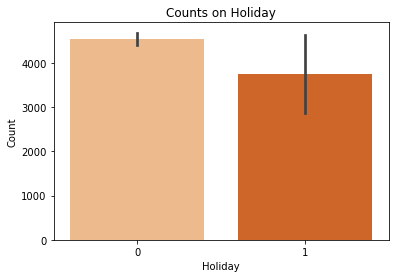

In [20]:
# Checking the distribution on holidays
plt.figure(figsize=[6,4])
sns.barplot(data=bike, x="Holiday", y="Count",palette="Oranges")
plt.title("Counts on Holiday")

#### <font color="blue">Inference from the plot
> - The number of bike users are less on holidays.

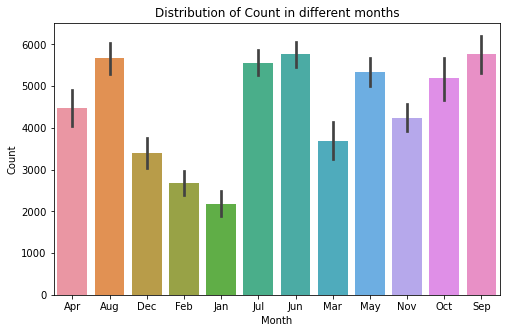

In [21]:
# Checking the distribution of counts on different months
plt.figure(figsize=[8,5])
sns.barplot(data=bike, x="Month", y="Count")
plt.title("Distribution of Count in different months")
plt.show()

#### <font color="blue">Inference from the plot
> - The number of counts is very less on january month.
> - Most counts are in the month june to sep.

#### <font color="blue">Derived columns:
> ##### 1. Part_month:
> - Dividing the month into three parts
> - first(first-10), second(11-20), third(20-last)
>    
> ##### 2. Quarterly:
> - Dividing the year into four parts
> - first(Jan,Feb,Mar), second(Apr,May,Jun), third(Jul,Aug,Sep), fourth(Oct,Nov,Dec)

In [22]:
# Creating a new variable part_month
bike["Part_month"] = pd.cut(bike["Day_of_month"], bins=[0,10,20,35], labels=["First_half","Second_half","Third_half"])

# Deleting the Day_of_month column, as we created a bin out of it.
bike.drop("Day_of_month", axis=1, inplace=True)

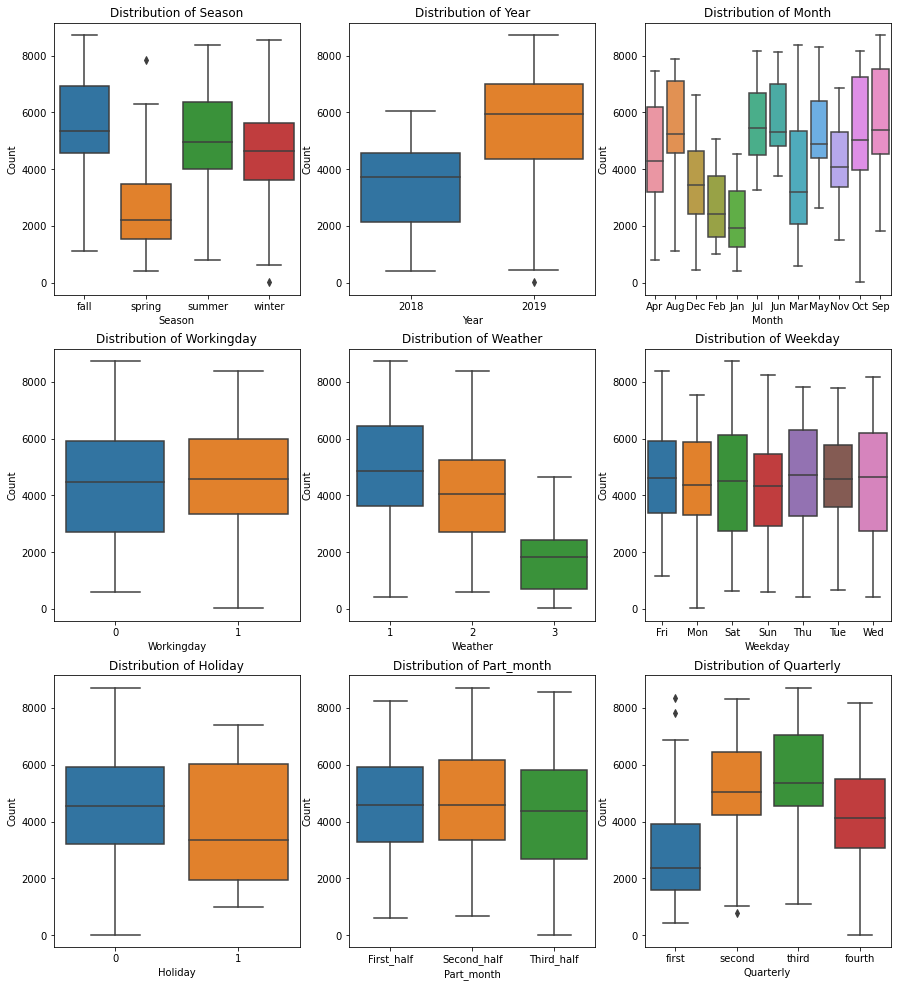

In [23]:
# Creating a function for boxplot
def boxplot(a,b):
    plt.subplot(3,3,a)
    plt.title("Distribution of"+" "+b)
    sns.boxplot(data=bike, x=b, y="Count")

# Plotting the boxplot for all categorical variables
plt.figure(figsize=[15,17])
Cat_bike = ["Season","Year","Month","Workingday","Weather","Weekday","Holiday","Part_month","Quarterly"]#Categorical data of bike
ax = 1
for i in Cat_bike:
    boxplot(ax,i)
    ax+=1   

#### <font color="blue">Inference from the plot
> - The number of bike users in spring is very low.
> - The count has increased significantly in 2019.
> - The count is less on holidays
> - The count is less on sundays
> - The number of bike users are more in clear, few clouds climate.
> - From the distribution of part_month it is evident that in the third half the count is less.
> - In the middle of the year the count is increasing. and in the first quarter of the year the count is vey less.

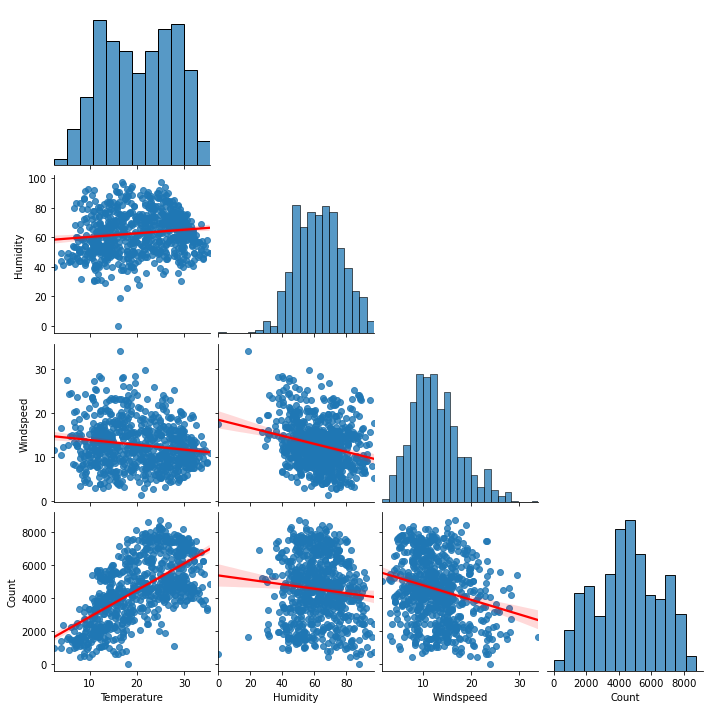

In [24]:
# Plotting pairplot for continuous variable
sns.pairplot(data=bike, vars=["Temperature","Humidity","Windspeed","Count"],  corner=True, kind="reg",
            plot_kws= {"line_kws":{"color":"red"}})
plt.show()

#### <font color="blue">Inference from the plot
> - There is high positive correlation between temperature and count.
> - There is negative correlation between count and windspeed.
> - Humidity and windspeed are negatively correlated.

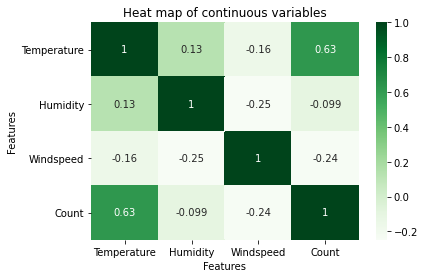

In [25]:
# Plotting heat map of continuos variable
sns.heatmap(bike.corr(), cmap="Greens", annot=True)
plt.title("Heat map of continuous variables")
plt.show()

#### <font color="blue">Inference from the plot
> - From the heat map it is evident that there is high positive correlation between temperature and count.

### Data Preparation

#### 1. Dummy variables creation:

In [26]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Season       730 non-null    category
 1   Year         730 non-null    category
 2   Month        730 non-null    category
 3   Holiday      730 non-null    category
 4   Weekday      730 non-null    category
 5   Workingday   730 non-null    category
 6   Weather      730 non-null    category
 7   Temperature  730 non-null    float64 
 8   Humidity     730 non-null    float64 
 9   Windspeed    730 non-null    float64 
 10  Count        730 non-null    int64   
 11  Quarterly    730 non-null    category
 12  Part_month   730 non-null    category
dtypes: category(9), float64(3), int64(1)
memory usage: 52.8 KB


In [27]:
# Creating dummy variable for categorical features
status = pd.get_dummies(bike[Cat_bike], drop_first=True)

# Concatenating the dummies to the original dataset
bike = pd.concat([bike, status], axis=1)

#dropping the original features as we created the dummies for that
bike.drop(Cat_bike, axis=1, inplace=True)
print("The shape of the bike dataset after creating dummy variables is",bike.shape)
bike.head()

The shape of the bike dataset after creating dummy variables is (730, 34)


,Temperature,Humidity,Windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Workingday_1,Weather_2,Weather_3,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Holiday_1,Part_month_Second_half,Part_month_Third_half,Quarterly_second,Quarterly_third,Quarterly_fourth
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
bike.describe()

,Temperature,Humidity,Windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Workingday_1,Weather_2,Weather_3,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Holiday_1,Part_month_Second_half,Part_month_Third_half,Quarterly_second,Quarterly_third,Quarterly_fourth
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.500000,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.683562,0.336986,0.028767,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.328767,0.342466,0.249315,0.252055,0.252055
std,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.500343,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.465405,0.473004,0.167266,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.470087,0.474860,0.432913,0.434490,0.434490
min,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


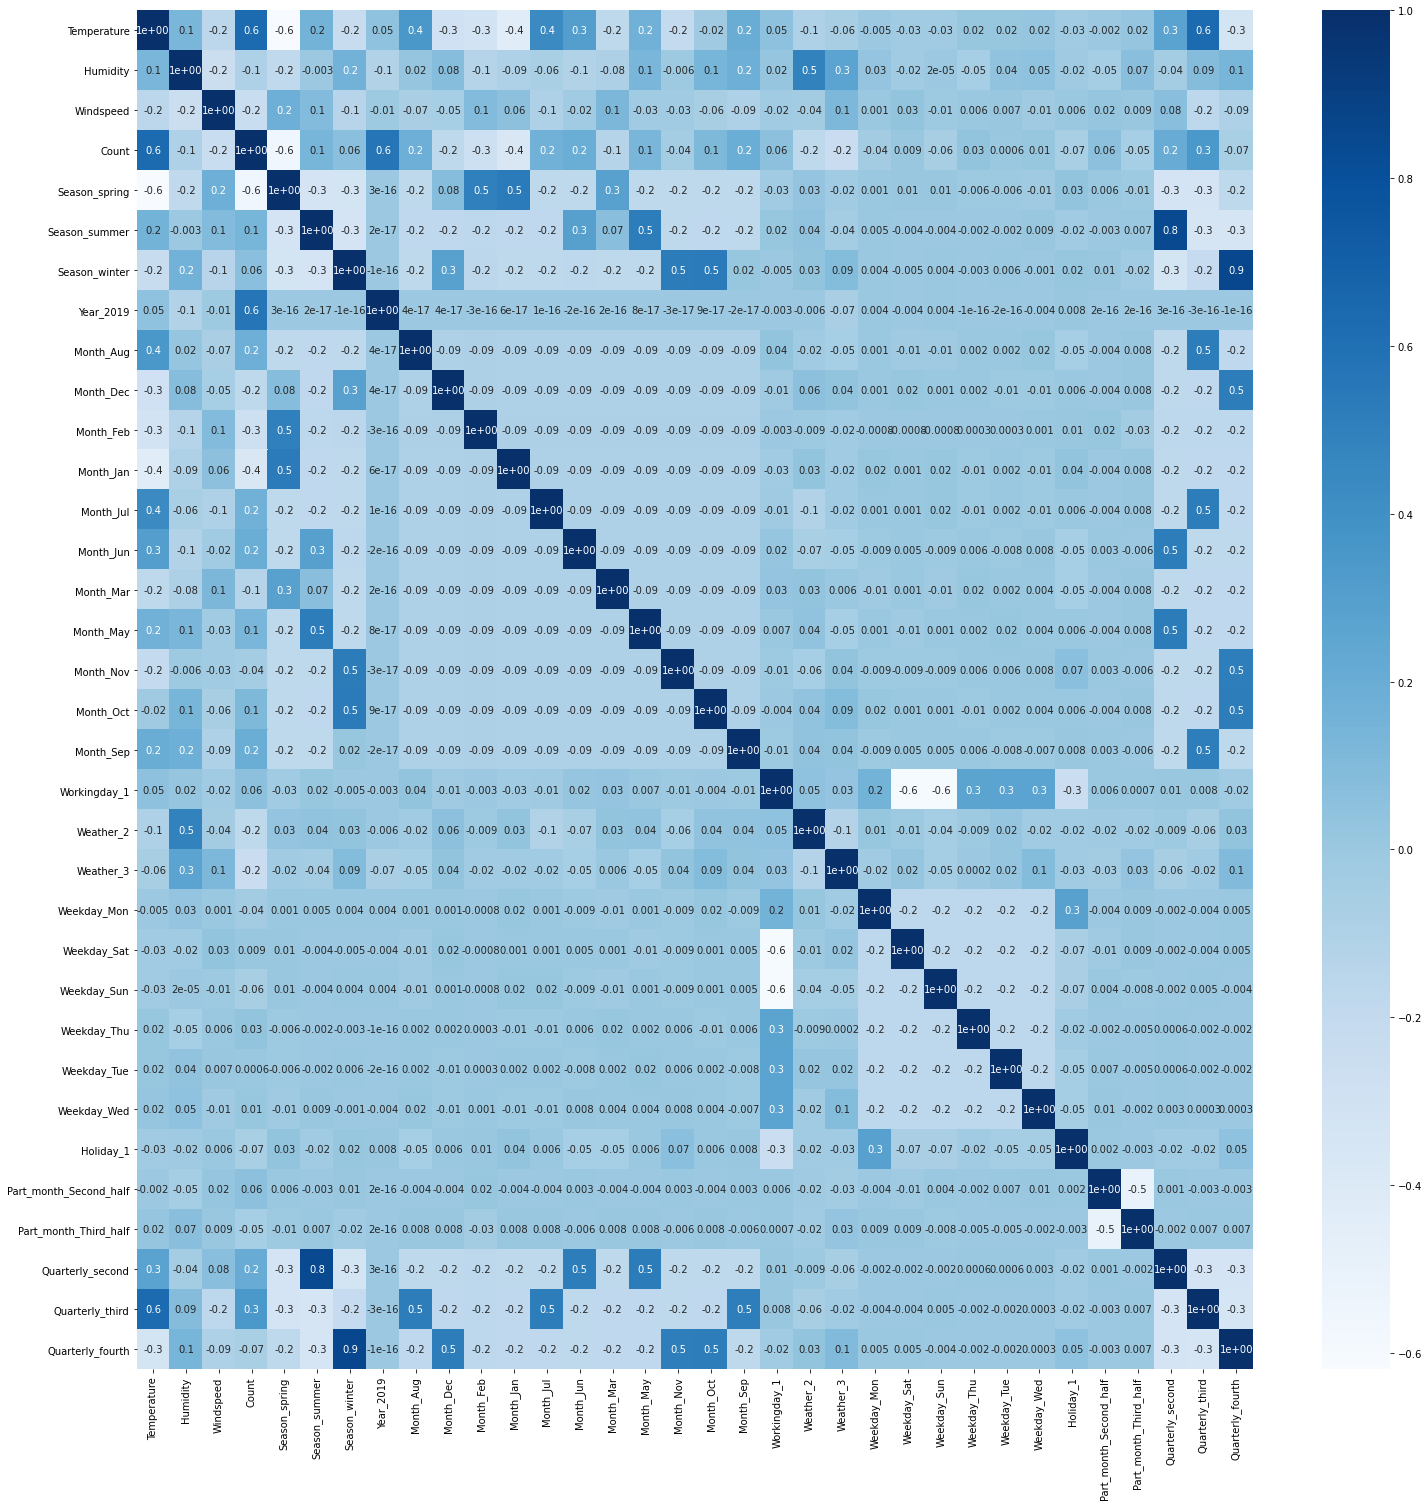

In [29]:
# Plotting a heatmap to visualize the correlation of all dummy variables
plt.figure(figsize=[25,25])
sns.heatmap(bike.corr(), cmap="Blues", annot=True, fmt="0.1")
plt.show()

#### <font color="blue">Inference from the plot
> - From the heat map we can easily find out the independent variables that are highly correlated, so that we can eliminate the feature to avoid multicollinearity.

#### 2. Splitting into train/test set:

In [30]:
# Importing train_test_split and MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting into train set and test set
bike_train, bike_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)
print("The shape of the train dataset is",bike_train.shape)
print("The shape of the test dataset is", bike_test.shape)

The shape of the train dataset is (510, 34)
The shape of the test dataset is (219, 34)


#### 3. Rescaling the train set:

In [31]:
# Creating a list of numerical variables
Num_bike = ["Temperature","Humidity","Windspeed","Count"]

# Scaling the numerical variables with min max scaler
scaler = MinMaxScaler()
bike_train[Num_bike] = scaler.fit_transform(bike_train[Num_bike])
bike_train.describe()

,Temperature,Humidity,Windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Workingday_1,Weather_2,Weather_3,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Holiday_1,Part_month_Second_half,Part_month_Third_half,Quarterly_second,Quarterly_third,Quarterly_fourth
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.676471,0.343137,0.029412,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.025490,0.327451,0.345098,0.237255,0.252941,0.256863
std,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.468282,0.475223,0.169124,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.157763,0.469744,0.475867,0.425818,0.435124,0.437332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 4. Creating dependent and independent variables of train set:

In [32]:
# Creating X_train and y_train from training dataset
y_train = bike_train.pop("Count")
X_train = bike_train
print("The shape of y_train is", y_train.shape)
print("The shape of X_train is", X_train.shape)

The shape of y_train is (510,)
The shape of X_train is (510, 33)


### Model Building

In [33]:
# Importing RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

> #### RFE:
> - Recursive feature elimination is a method of automatic feature elimination. and using this lets reduce the features upto considerable count where we can perform manual feature selection.


In [34]:
# Calling the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
# Reducing upto 15 features
rfe = RFE(lm, 15)   
rfe = rfe.fit(X_train,y_train)

In [35]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Temperature', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', False, 19),
 ('Season_winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Aug', False, 10),
 ('Month_Dec', False, 4),
 ('Month_Feb', False, 6),
 ('Month_Jan', False, 2),
 ('Month_Jul', False, 9),
 ('Month_Jun', False, 13),
 ('Month_Mar', True, 1),
 ('Month_May', False, 11),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 5),
 ('Month_Sep', True, 1),
 ('Workingday_1', True, 1),
 ('Weather_2', True, 1),
 ('Weather_3', True, 1),
 ('Weekday_Mon', False, 16),
 ('Weekday_Sat', True, 1),
 ('Weekday_Sun', False, 3),
 ('Weekday_Thu', False, 17),
 ('Weekday_Tue', False, 14),
 ('Weekday_Wed', False, 15),
 ('Holiday_1', True, 1),
 ('Part_month_Second_half', False, 12),
 ('Part_month_Third_half', False, 18),
 ('Quarterly_second', True, 1),
 ('Quarterly_third', False, 8),
 ('Quarterly_fourth', False, 7)]

In [36]:
# Extracting the columns from the X_train that are selected through RFE
col = X_train.columns[rfe.support_]

# Creating a new dataset with features selected by RFE
X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 15)

In [37]:
# Importing variance inflation factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a function that gives vif table for the dataframe input
def vif_table(a):
    vif = pd.DataFrame()
    X = a.drop("const", axis=1)
    vif["features"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
    return vif.sort_values(by = "VIF", ascending=False)

#### Model 1

In [38]:
# Adding constant to the varible
X_train_1 = sm.add_constant(X_train_rfe)

# Creating model 1
model_1 = sm.OLS(y_train, X_train_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          2.93e-189
Time:                        00:30:14   Log-Likelihood:                 514.86
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -930.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2572      0.034      7.499      0.000       0.190       0.325
Temperature          0.4570      0.030     15.489      0.000       0.399       0.515
Humidity            -0.1340      0.037     -3.592      0.000      -0.207      -0.061
Windspeed           -0.1757      0.026     -6.882      0.000      -0.226      -0.126
Season_spring       -0.0840      0.017     -4.835      0.000      -0.118      -0.050
Season_winter        0.1023      0.015      6.665      0.000       0.072       0.133
Year_2019            0.2317      0.008     28.749      0.000       0.216       0.248
Month_Mar            0.0499      0.015      3.419      0.001       0.021       0.079
Month_Nov           -0.0269      0.017     -1.568      0.117      -0.061       0.007
Month_Sep            0.0915      0.016      5.747      0.000       0.060       0.123
Workingday_1         0.0444      0.012      3.818      0.000       0.022       0.067
Weather_2           -0.0589      0.010     -5.627      0.000      -0.080      -0.038
Weather_3           -0.2566      0.026     -9.780      0.000      -0.308      -0.205
Weekday_Sat          0.0538      0.015      3.671      0.000       0.025       0.083
Holiday_1           -0.0470      0.027     -1.718      0.086      -0.101       0.007
Quarterly_second     0.0522      0.012      4.179      0.000       0.028       0.077
==============================================================================
Omnibus:                       75.693   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.921
Skew:                          -0.767   Prob(JB):                     1.15e-40
Kurtosis:                       5.511   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Checking vif values
vif_table(X_train_1)

,features,VIF
1,Humidity,24.66
0,Temperature,13.88
9,Workingday_1,5.24
2,Windspeed,4.53
3,Season_spring,3.34
4,Season_winter,3.22
10,Weather_2,2.26
14,Quarterly_second,2.14
5,Year_2019,2.07
12,Weekday_Sat,1.95


####  <font color = "blue">Suggestion:
> - We can drop Humidity feature as it have high vif value.

#### Model 2

In [40]:
# Dropping the humidity column
X_train_rfe2 =  X_train_rfe.drop("Humidity", axis=1)

# Adding constant 
X_train_2 = sm.add_constant(X_train_rfe2)

# Building model
model_2 = sm.OLS(y_train, X_train_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.8
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          1.19e-187
Time:                        00:30:15   Log-Likelihood:                 508.28
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     495   BIC:                            -923.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1821      0.028      6.620      0.000       0.128       0.236
Temperature          0.4352      0.029     14.894      0.000       0.378       0.493
Windspeed           -0.1506      0.025     -6.061      0.000      -0.199      -0.102
Season_spring       -0.0876      0.018     -4.997      0.000      -0.122      -0.053
Season_winter        0.0927      0.015      6.058      0.000       0.063       0.123
Year_2019            0.2348      0.008     28.955      0.000       0.219       0.251
Month_Mar            0.0508      0.015      3.444      0.001       0.022       0.080
Month_Nov           -0.0241      0.017     -1.393      0.164      -0.058       0.010
Month_Sep            0.0873      0.016      5.433      0.000       0.056       0.119
Workingday_1         0.0468      0.012      3.981      0.000       0.024       0.070
Weather_2           -0.0807      0.009     -9.343      0.000      -0.098      -0.064
Weather_3           -0.2933      0.024    -12.000      0.000      -0.341      -0.245
Weekday_Sat          0.0578      0.015      3.910      0.000       0.029       0.087
Holiday_1           -0.0456      0.028     -1.650      0.100      -0.100       0.009
Quarterly_second     0.0508      0.013      4.025      0.000       0.026       0.076
==============================================================================
Omnibus:                       75.746   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.478
Skew:                          -0.768   Prob(JB):                     1.44e-40
Kurtosis:                       5.505   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Checking vif values
vif_table(X_train_2)

,features,VIF
0,Temperature,5.89
8,Workingday_1,5.08
1,Windspeed,4.53
3,Season_winter,2.27
2,Season_spring,2.25
4,Year_2019,2.06
13,Quarterly_second,1.97
11,Weekday_Sat,1.93
6,Month_Nov,1.59
9,Weather_2,1.54


####  <font color = "blue">Suggestion:
> - We can drop month_nov as it have high p-value

#### Model 3

In [42]:
# Dropping Month nov feature
X_train_rfe3 = X_train_rfe2.drop("Month_Nov", axis=1)

# Adding constant
X_train_3 = sm.add_constant(X_train_rfe3)

# Building model
Model_3 = sm.OLS(y_train, X_train_3).fit()
Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.7
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          2.15e-188
Time:                        00:30:15   Log-Likelihood:                 507.28
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     496   BIC:                            -927.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1780      0.027      6.502      0.000       0.124       0.232
Temperature          0.4405      0.029     15.189      0.000       0.384       0.497
Windspeed           -0.1526      0.025     -6.143      0.000      -0.201      -0.104
Season_spring       -0.0845      0.017     -4.854      0.000      -0.119      -0.050
Season_winter        0.0864      0.015      5.904      0.000       0.058       0.115
Year_2019            0.2348      0.008     28.925      0.000       0.219       0.251
Month_Mar            0.0513      0.015      3.473      0.001       0.022       0.080
Month_Sep            0.0896      0.016      5.597      0.000       0.058       0.121
Workingday_1         0.0466      0.012      3.965      0.000       0.024       0.070
Weather_2           -0.0802      0.009     -9.283      0.000      -0.097      -0.063
Weather_3           -0.2917      0.024    -11.937      0.000      -0.340      -0.244
Weekday_Sat          0.0581      0.015      3.928      0.000       0.029       0.087
Holiday_1           -0.0500      0.027     -1.819      0.070      -0.104       0.004
Quarterly_second     0.0521      0.013      4.134      0.000       0.027       0.077
==============================================================================
Omnibus:                       73.563   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.847
Skew:                          -0.754   Prob(JB):                     1.08e-38
Kurtosis:                       5.440   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Checking vif values
vif_table(X_train_3)

,features,VIF
0,Temperature,5.85
7,Workingday_1,5.06
1,Windspeed,4.48
2,Season_spring,2.24
4,Year_2019,2.06
12,Quarterly_second,1.97
10,Weekday_Sat,1.93
3,Season_winter,1.79
8,Weather_2,1.54
5,Month_Mar,1.30


####  <font color = "blue">Suggestion:
> - We can drop Windspeed feature, as the temperature and workingday will be useful for the interpretation of the model.

####  Model 4

In [44]:
# Dropping windspeed feature
X_train_rfe4 = X_train_rfe3.drop("Windspeed", axis=1)

# Creating constant
X_train_4 = sm.add_constant(X_train_rfe4)

# Building model
Model_4 = sm.OLS(y_train, X_train_4).fit()
Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.5
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          1.09e-181
Time:                        00:30:15   Log-Likelihood:                 488.58
No. Observations:                 510   AIC:                            -951.2
Df Residuals:                     497   BIC:                            -896.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1225      0.027      4.575      0.000       0.070       0.175
Temperature          0.4588      0.030     15.346      0.000       0.400       0.517
Season_spring       -0.0891      0.018     -4.941      0.000      -0.124      -0.054
Season_winter        0.0895      0.015      5.910      0.000       0.060       0.119
Year_2019            0.2336      0.008     27.781      0.000       0.217       0.250
Month_Mar            0.0425      0.015      2.793      0.005       0.013       0.072
Month_Sep            0.0940      0.017      5.676      0.000       0.061       0.127
Workingday_1         0.0474      0.012      3.895      0.000       0.024       0.071
Weather_2           -0.0788      0.009     -8.801      0.000      -0.096      -0.061
Weather_3           -0.3067      0.025    -12.173      0.000      -0.356      -0.257
Weekday_Sat          0.0556      0.015      3.627      0.000       0.025       0.086
Holiday_1           -0.0537      0.028     -1.885      0.060      -0.110       0.002
Quarterly_second     0.0436      0.013      3.358      0.001       0.018       0.069
==============================================================================
Omnibus:                       76.031   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.033
Skew:                          -0.747   Prob(JB):                     9.94e-44
Kurtosis:                       5.663   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Checking vif
vif_table(X_train_4)

,features,VIF
0,Temperature,5.30
6,Workingday_1,4.99
3,Year_2019,2.06
9,Weekday_Sat,1.89
1,Season_spring,1.84
11,Quarterly_second,1.82
2,Season_winter,1.66
7,Weather_2,1.53
4,Month_Mar,1.28
5,Month_Sep,1.26


####  <font color = "blue">Suggestion:
> - We can drop Holiday_1 feature as it have high p-value

#### Model 5

In [46]:
# Dropping Holiday_1 feature
X_train_rfe5 = X_train_rfe4.drop("Holiday_1", axis=1)

# Adding constant
X_train_5 = sm.add_constant(X_train_rfe5)

# Building model
Model_5 = sm.OLS(y_train, X_train_5).fit()
Model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.3
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          4.20e-182
Time:                        00:30:15   Log-Likelihood:                 486.77
No. Observations:                 510   AIC:                            -949.5
Df Residuals:                     498   BIC:                            -898.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1140      0.026      4.309      0.000       0.062       0.166
Temperature          0.4598      0.030     15.346      0.000       0.401       0.519
Season_spring       -0.0901      0.018     -4.989      0.000      -0.126      -0.055
Season_winter        0.0889      0.015      5.857      0.000       0.059       0.119
Year_2019            0.2337      0.008     27.728      0.000       0.217       0.250
Month_Mar            0.0438      0.015      2.874      0.004       0.014       0.074
Month_Sep            0.0922      0.017      5.560      0.000       0.060       0.125
Workingday_1         0.0553      0.011      4.827      0.000       0.033       0.078
Weather_2           -0.0783      0.009     -8.729      0.000      -0.096      -0.061
Weather_3           -0.3057      0.025    -12.105      0.000      -0.355      -0.256
Weekday_Sat          0.0636      0.015      4.306      0.000       0.035       0.093
Quarterly_second     0.0440      0.013      3.383      0.001       0.018       0.070
==============================================================================
Omnibus:                       78.914   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.945
Skew:                          -0.770   Prob(JB):                     7.00e-46
Kurtosis:                       5.723   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Checking vif values
vif_table(X_train_5)

,features,VIF
0,Temperature,5.04
6,Workingday_1,4.52
3,Year_2019,2.06
10,Quarterly_second,1.81
9,Weekday_Sat,1.78
1,Season_spring,1.72
2,Season_winter,1.59
7,Weather_2,1.53
4,Month_Mar,1.28
5,Month_Sep,1.25


####  <font color = "blue">Suggestion:
> - We can drop Month_mar feature as it have high p-value.

#### Model 6

In [48]:
# Dropping month_mar feature
X_train_rfe6 = X_train_rfe5.drop("Month_Mar", axis=1)

# Adding constant
X_train_6 = sm.add_constant(X_train_rfe6)

# Building model
Model_6 = sm.OLS(y_train, X_train_6).fit()
Model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.8
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          1.58e-181
Time:                        00:30:16   Log-Likelihood:                 482.57
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     499   BIC:                            -896.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1260      0.026      4.784      0.000       0.074       0.178
Temperature          0.4507      0.030     15.018      0.000       0.392       0.510
Season_spring       -0.0897      0.018     -4.932      0.000      -0.125      -0.054
Season_winter        0.0797      0.015      5.331      0.000       0.050       0.109
Year_2019            0.2341      0.008     27.571      0.000       0.217       0.251
Month_Sep            0.0868      0.017      5.230      0.000       0.054       0.119
Workingday_1         0.0573      0.012      4.969      0.000       0.035       0.080
Weather_2           -0.0785      0.009     -8.688      0.000      -0.096      -0.061
Weather_3           -0.3031      0.025    -11.922      0.000      -0.353      -0.253
Weekday_Sat          0.0655      0.015      4.411      0.000       0.036       0.095
Quarterly_second     0.0362      0.013      2.824      0.005       0.011       0.061
==============================================================================
Omnibus:                       77.115   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.017
Skew:                          -0.720   Prob(JB):                     1.37e-49
Kurtosis:                       5.919   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Checking vif values
vif_table(X_train_6)

,features,VIF
0,Temperature,5.02
5,Workingday_1,4.45
3,Year_2019,2.05
8,Weekday_Sat,1.77
9,Quarterly_second,1.76
1,Season_spring,1.64
2,Season_winter,1.56
6,Weather_2,1.53
4,Month_Sep,1.24
7,Weather_3,1.07


####  <font color = "blue">Suggestion:
> - We can drop quarterly_second as it have high p-value comparing to others.

#### Model 7

In [50]:
# Dropping month_mar feature
X_train_rfe7 = X_train_rfe6.drop("Quarterly_second", axis=1)

# Adding constant
X_train_7 = sm.add_constant(X_train_rfe7)

# Building model
Model_7 = sm.OLS(y_train, X_train_7).fit()
Model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.4
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          4.93e-181
Time:                        00:30:16   Log-Likelihood:                 478.53
No. Observations:                 510   AIC:                            -937.1
Df Residuals:                     500   BIC:                            -894.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1592      0.024      6.710      0.000       0.113       0.206
Temperature       0.4305      0.029     14.668      0.000       0.373       0.488
Season_spring    -0.1164      0.016     -7.433      0.000      -0.147      -0.086
Season_winter     0.0571      0.013      4.490      0.000       0.032       0.082
Year_2019         0.2345      0.009     27.427      0.000       0.218       0.251
Month_Sep         0.0732      0.016      4.579      0.000       0.042       0.105
Workingday_1      0.0567      0.012      4.884      0.000       0.034       0.080
Weather_2        -0.0788      0.009     -8.659      0.000      -0.097      -0.061
Weather_3        -0.3061      0.026    -11.965      0.000      -0.356      -0.256
Weekday_Sat       0.0642      0.015      4.292      0.000       0.035       0.094
==============================================================================
Omnibus:                       76.518   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.563
Skew:                          -0.724   Prob(JB):                     9.42e-48
Kurtosis:                       5.845   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Checking vif values
vif_table(X_train_7)

,features,VIF
0,Temperature,4.61
5,Workingday_1,4.33
3,Year_2019,2.05
8,Weekday_Sat,1.74
6,Weather_2,1.52
1,Season_spring,1.50
2,Season_winter,1.37
4,Month_Sep,1.15
7,Weather_3,1.07


In [63]:
from meteocalc import Temp, dew_point, heat_index, wind_chill